In [130]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
COUNTRY_PATH = "../noah_example/Country_Profiles_Clean.csv"
EVENT_PATH = "../noah_example/Datasets/Olympic_Athlete_Event_Details.csv"
CURRENT_YEAR = 2024
OLDEST_YEAR_OF_INTEREST = CURRENT_YEAR - 20
MEDAL_TYPES = ('Gold', 'Silver', 'Bronze')


In [132]:
# read it in:
country_df= pd.read_csv(COUNTRY_PATH).drop(index=234)
print(country_df.shape)
country_df.head()

(234, 2)


,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [133]:
dup_both_mask_s = country_df.duplicated(keep=False)
print(dup_both_mask_s.sum())
dup_noc_mask_s = country_df.duplicated(subset='noc', keep=False)
print(dup_noc_mask_s.sum())
dup_country_mask_s = country_df.duplicated(subset='country', keep=False)
country_df[dup_country_mask_s].sort_values("country")


0
0


,noc,country
10,ANZ,Australia
11,AUS,Australia
23,BOH,Czechia
52,CZE,Czechia
60,GDR,Germany
75,GER,Germany
228,FRG,Germany
173,SAA,Germany
54,PRK,Republic of Korea
166,KOR,Republic of Korea


In [134]:
dup_both_mask_s.sum()

0

In [135]:
dup_country_mask_s.sum() 

23

In [136]:
event_df= pd.read_csv(EVENT_PATH)\
.dropna()\
.rename(columns = {"country_noc" : "noc"})

event_df[['year', 'season']] = event_df['edition'].str.split(' ', n=1, expand=True)
event_df['year'] = event_df['year'].astype(int)

print(event_df.info())
print(event_df.shape)
event_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44687 entries, 20 to 316816
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 4.5+ MB
None
(44687, 13)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season
20,1908 Summer Olympics,5,ANZ,Athletics,"3,500 metres Race Walk, Men",56421,Harry Kerr,64719,3,Bronze,False,1908,Summer Olympics
30,1908 Summer Olympics,5,ANZ,Boxing,"Middleweight, Men",21263,Snowy Baker,45153,2,Silver,False,1908,Summer Olympics
32,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,John Barnett,11237,1,Gold,True,1908,Summer Olympics
33,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Phil Carmichael,11239,1,Gold,True,1908,Summer Olympics
34,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Dan Carroll,11240,1,Gold,True,1908,Summer Olympics


In [137]:
#merge country medal with olympic athlete event to extract gender
country_event_df = pd.merge(event_df, country_df, on="noc", how="left")
country_event_df.info()
print(country_event_df.shape)
country_event_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44687 entries, 0 to 44686
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
 13  country      44687 non-null  object
dtypes: bool(1), int64(4), object(9)
memory usage: 4.5+ MB
(44687, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
44682,2022 Winter Olympics,62,USA,Speed Skating,"500 metres, Women",19020424,Erin Jackson,138378,1,Gold,False,2022,Winter Olympics,United States
44683,2022 Winter Olympics,62,USA,Speed Skating,"1,000 metres, Women",19020425,Brittany Bowe,128778,3,Bronze,False,2022,Winter Olympics,United States
44684,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Kaillie Humphries,118672,1,Gold,False,2022,Winter Olympics,United States
44685,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Elana Meyers Taylor,118644,2,Silver,False,2022,Winter Olympics,United States
44686,2022 Winter Olympics,62,CAN,Bobsleigh,"Monobob, Women",19019671,Christine de Bruin,136825,3,Bronze,False,2022,Winter Olympics,Canada


In [138]:
#I want to filter for up to 20years:
year_mask_s = country_event_df["year"] >= OLDEST_YEAR_OF_INTEREST 
country_event_recent_df = country_event_df[year_mask_s]
print(country_event_recent_df.shape)
country_event_recent_df.head()

(13697, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan


In [162]:
country_event_recent_df.groupby(["Gender", "medal"]).head()

,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan,Flyweight,Men
61,2012 Summer Olympics,54,AFG,Taekwondo,"Featherweight, Men",325026,Rohullah Nikpai,117410,=3,Bronze,False,2012,Summer Olympics,Afghanistan,Featherweight,Men
66,2004 Summer Olympics,26,AZE,Boxing,"Flyweight, Men",27411,Fuad Aslanov,106167,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Flyweight,Men
67,2004 Summer Olympics,26,AZE,Boxing,"Bantamweight, Men",27447,Ağası Məmmədov,90027,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Bantamweight,Men
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women
69,2004 Summer Olympics,26,AZE,Shooting,"Skeet, Women",52043,Zemfira Meftaxetdinova,93007,3,Bronze,False,2004,Summer Olympics,Azerbaijan,Skeet,Women


In [158]:
country_event_recent_df.sort_values("year")

,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
17874,2004 Summer Olympics,26,BAH,Athletics,"200 metres, Women",66430,Debbie Ferguson,64991,3,Bronze,False,2004,Summer Olympics,The Bahamas
8244,2004 Summer Olympics,26,AUS,Rowing,"Coxless Pairs, Men",159765,James Tomkins,35534,1,Gold,True,2004,Summer Olympics,Australia
8245,2004 Summer Olympics,26,AUS,Rowing,"Eights, Men",159787,Stefan Szczurowski,104466,3,Bronze,True,2004,Summer Olympics,Australia
8246,2004 Summer Olympics,26,AUS,Rowing,"Eights, Men",159787,Stuart Reside,89321,3,Bronze,True,2004,Summer Olympics,Australia
8247,2004 Summer Olympics,26,AUS,Rowing,"Eights, Men",159787,Stuart Welch,88878,3,Bronze,True,2004,Summer Olympics,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,2022 Winter Olympics,62,ROC,Biathlon,"4 × 6 kilometres Relay, Women",19019639,Ulyana Nigmatullina,137781,2,Silver,True,2022,Winter Olympics,Russian Federation
10432,2022 Winter Olympics,62,ROC,Biathlon,"2 × 6 kilometres and 2 × 7.5 kilometres Relay,...",19019640,Ulyana Nigmatullina,137781,3,Bronze,True,2022,Winter Olympics,Russian Federation
10433,2022 Winter Olympics,62,ROC,Biathlon,"2 × 6 kilometres and 2 × 7.5 kilometres Relay,...",19019640,Kristina Reztsova,148767,3,Bronze,True,2022,Winter Olympics,Russian Federation
27015,2022 Winter Olympics,62,GBR,Curling,"Curling, Women",19019814,Jenn Dodds,148349,1,Gold,True,2022,Winter Olympics,Great Britain


In [163]:
#look for gold wins: female, last 10 years and top 10 countries
#olympic athlete event to seperate columns
# Split the 'Event' column into 'Event' and 'Gender' columns
country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')
print(country_event_recent_df.info())
print(country_event_recent_df.shape)
country_event_recent_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 13697 entries, 55 to 44686
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      13697 non-null  object
 1   edition_id   13697 non-null  int64 
 2   noc          13697 non-null  object
 3   sport        13697 non-null  object
 4   event        13697 non-null  object
 5   result_id    13697 non-null  int64 
 6   athlete      13697 non-null  object
 7   athlete_id   13697 non-null  int64 
 8   pos          13697 non-null  object
 9   medal        13697 non-null  object
 10  isTeamSport  13697 non-null  bool  
 11  year         13697 non-null  int64 
 12  season       13697 non-null  object
 13  country      13697 non-null  object
 14  Event        13697 non-null  object
 15  Gender       13697 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 1.7+ MB
None
(13697, 16)


/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_22907/3749828534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan,Flyweight,Men
61,2012 Summer Olympics,54,AFG,Taekwondo,"Featherweight, Men",325026,Rohullah Nikpai,117410,=3,Bronze,False,2012,Summer Olympics,Afghanistan,Featherweight,Men
66,2004 Summer Olympics,26,AZE,Boxing,"Flyweight, Men",27411,Fuad Aslanov,106167,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Flyweight,Men
67,2004 Summer Olympics,26,AZE,Boxing,"Bantamweight, Men",27447,Ağası Məmmədov,90027,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Bantamweight,Men
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women
69,2004 Summer Olympics,26,AZE,Shooting,"Skeet, Women",52043,Zemfira Meftaxetdinova,93007,3,Bronze,False,2004,Summer Olympics,Azerbaijan,Skeet,Women


In [160]:
country_event_recent_df.Gender.value_counts()

Gender
Men      6822
Women    6039
Mixed     526
Open      310
Name: count, dtype: int64

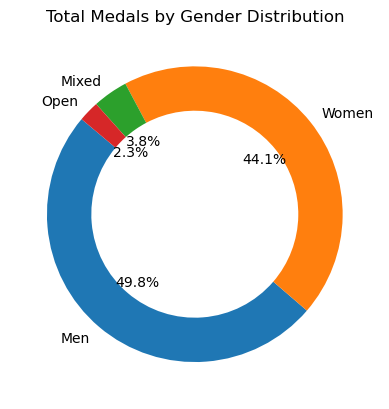

In [161]:
# Get the gender counts
gender_counts = country_event_recent_df.Gender.value_counts()

# Create a donut chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Total Medals by Gender Distribution')
plt.savefig("gender_plots/Total_Medals_by_Gender_Distribution.png")
plt.show()

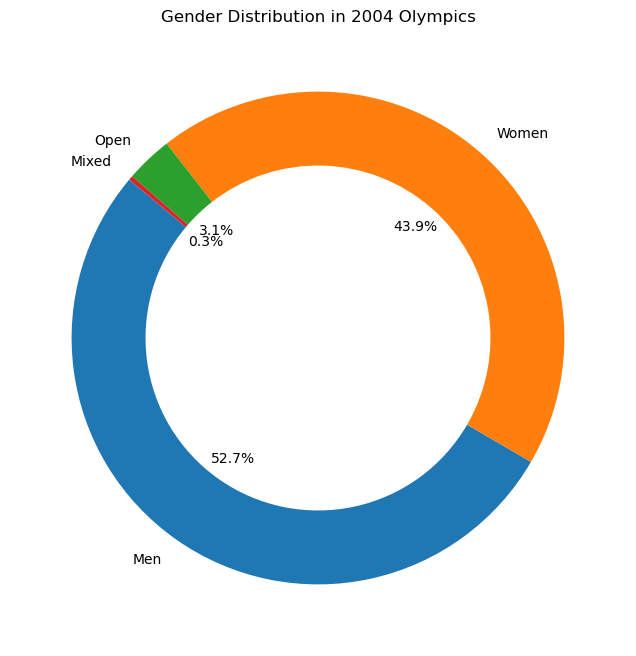

In [164]:


# Filter the data for 2004
data_2004 = country_event_recent_df[country_event_recent_df['year'] == 2004]

# Group the data by gender and count the occurrences
gender_counts_2004 = data_2004['Gender'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_2004, labels=gender_counts_2004.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution in 2004 Olympics')
plt.savefig("gender_plots/gender_distribution_in_2004_olympics_vs_Year.png")
plt.show()


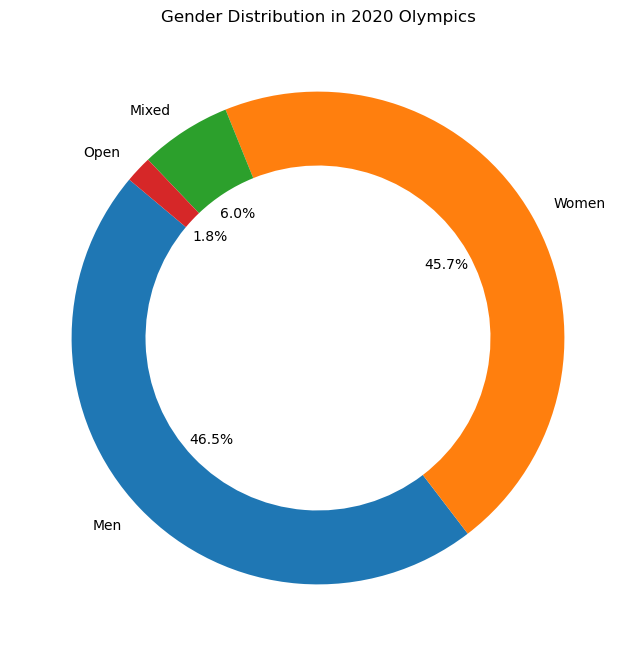

In [165]:


# Filter the data for 2020
data_2020 = country_event_recent_df[country_event_recent_df['year'] == 2020]

# Group the data by gender and count the occurrences
gender_counts_2020 = data_2020['Gender'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_2020, labels=gender_counts_2020.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution in 2020 Olympics')
plt.savefig("gender_plots/gender_distribution_in_2020_olympics_vs_Year.png")
plt.show()

In [166]:
female_mask_s = country_event_recent_df['Gender'] == 'Women'
female_country_event_recent_df = country_event_recent_df[female_mask_s]
print(female_country_event_recent_df.shape)
female_country_event_recent_df.head()

(6039, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women


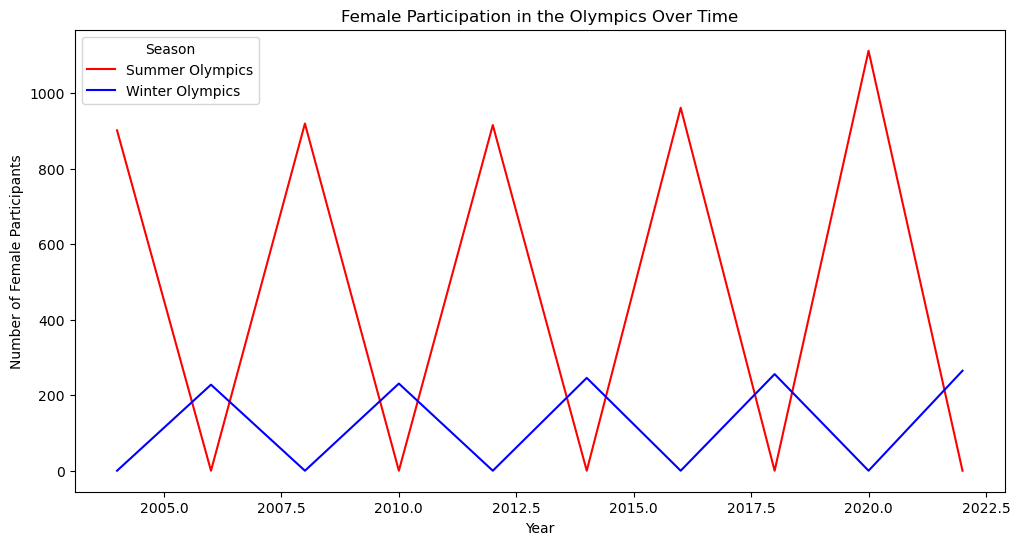

In [145]:
female_data = female_country_event_recent_df
grouped_data = female_data.groupby(['year', 'season']).size().reset_index(name='Female Participants')
colors = ['red', 'blue']

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot_table(index='year', columns='season', values='Female Participants', fill_value=0)

# Create the line plot
pivoted_data.plot(figsize=(12, 6), color=colors)
plt.title('Female Participation in the Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Female Participants')
plt.legend(title='Season')
plt.savefig("gender_plots/Female_participation_in_the_Olympics_over_time.png")
plt.show()



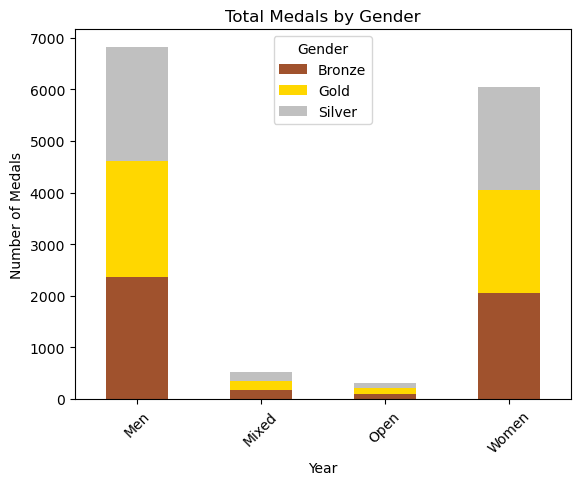

In [167]:
# Total Medals by Gender
grouped_data = country_event_recent_df.groupby(["Gender", "medal"]).size().reset_index(name='count')
pivoted_data = grouped_data.pivot_table(index='Gender', columns='medal', values='count')
pivoted_data.plot(kind='bar', stacked=True, color = ["sienna", "gold", "silver"])

# Customize the plot
plt.title('Total Medals by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.savefig("gender_plots/Total_Medals_by_Gender.png")
plt.show()

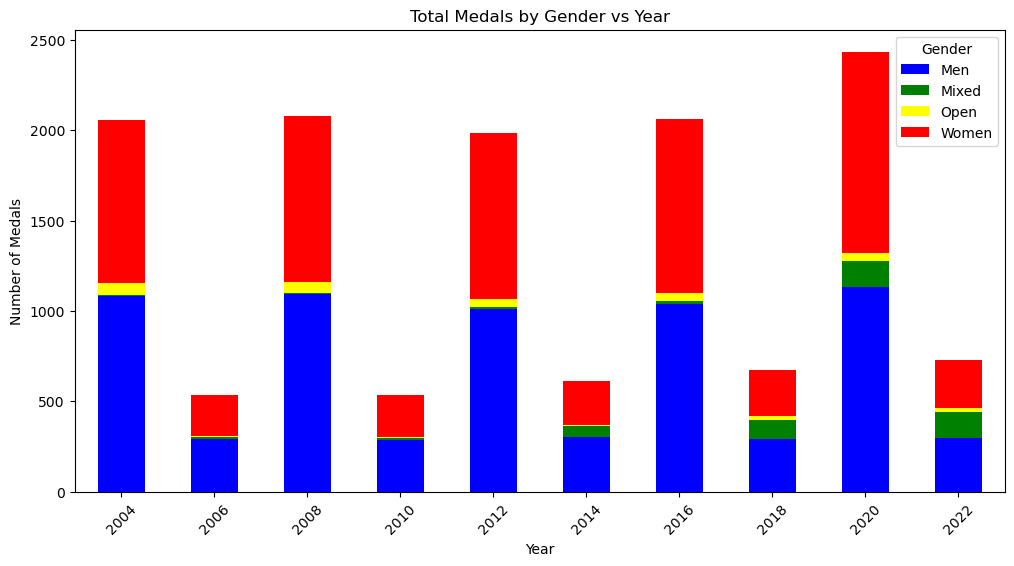

In [168]:
#Stacked bar of Total Medal by Year Stacked by Gender
#grouped_data = country_event_recent_df.groupby(['Gender', 'year', 'medal']).size().reset_index(name='count')
#pivoted_data = grouped_data.pivot_table(index=['year', 'medal'], columns='Gender', values='count', fill_value=0)
grouped_data = country_event_recent_df.groupby(['year', 'Gender']).size()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each gender
grouped_data.unstack().plot(kind='bar', stacked=True, ax=ax, color = ["blue", "green", "yellow", "red"])

# Customize the plot
plt.title('Total Medals by Gender vs Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.savefig("gender_plots/Total_Medals_by_Gender_vs_Year.png")
plt.show()

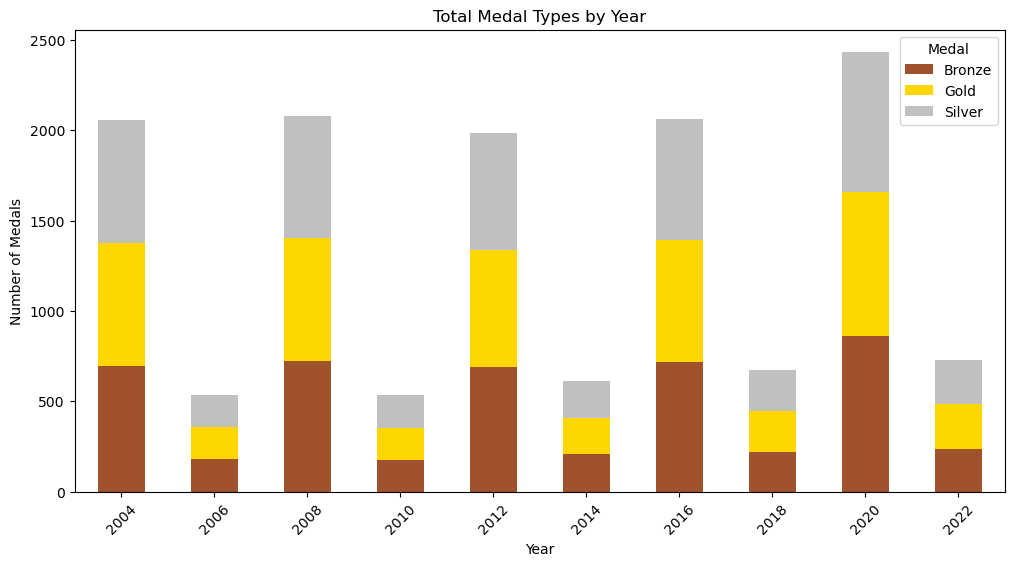

In [148]:
grouped_data = country_event_recent_df.groupby(['year', 'medal']).size()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each gender
grouped_data.unstack().plot(kind='bar', stacked=True, ax=ax, color = ["sienna", "gold", "silver"])

# Customize the plot
plt.title('Total Medal Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.savefig("gender_plots/Total_Medals_by_Gender_vs_Year.png")
plt.show()

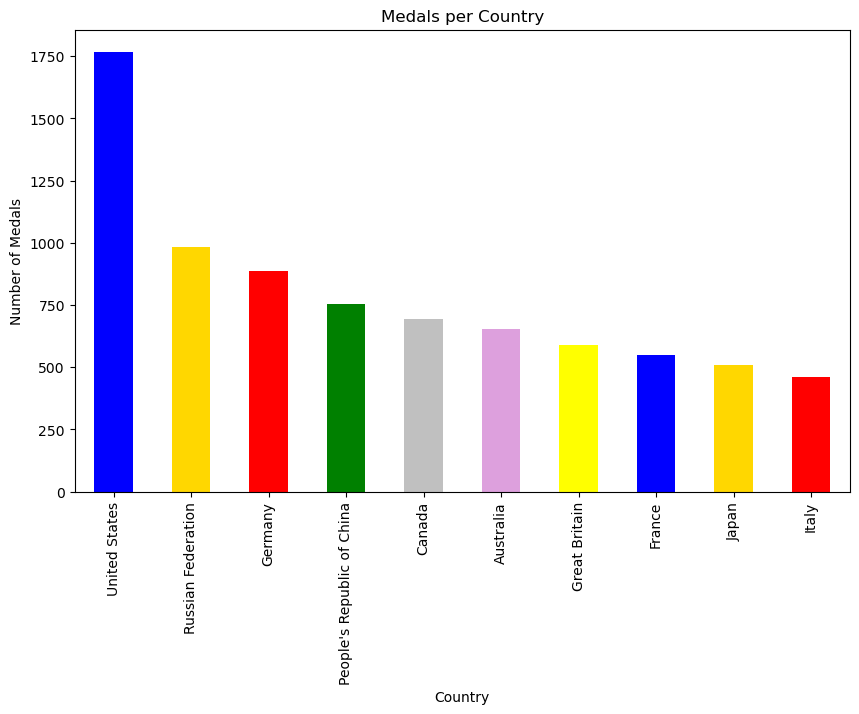

In [149]:

medals_per_country = country_event_recent_df.groupby('country')['medal'].count().sort_values(ascending=False)

medals_per_country.head(10).plot(kind='bar', figsize=(10, 6), color = ["blue", "gold", "red", "green", "silver", "plum", "yellow"] )
plt.title('Medals per Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.savefig("gender_plots/Medals_per_Country.png")
plt.show()

In [150]:
medals_per_year = country_event_recent_df.groupby('year')['medal'].count()
medals_per_year.head(10)

year
2004    2054
2006     535
2008    2080
2010     534
2012    1983
2014     615
2016    2063
2018     673
2020    2434
2022     726
Name: medal, dtype: int64

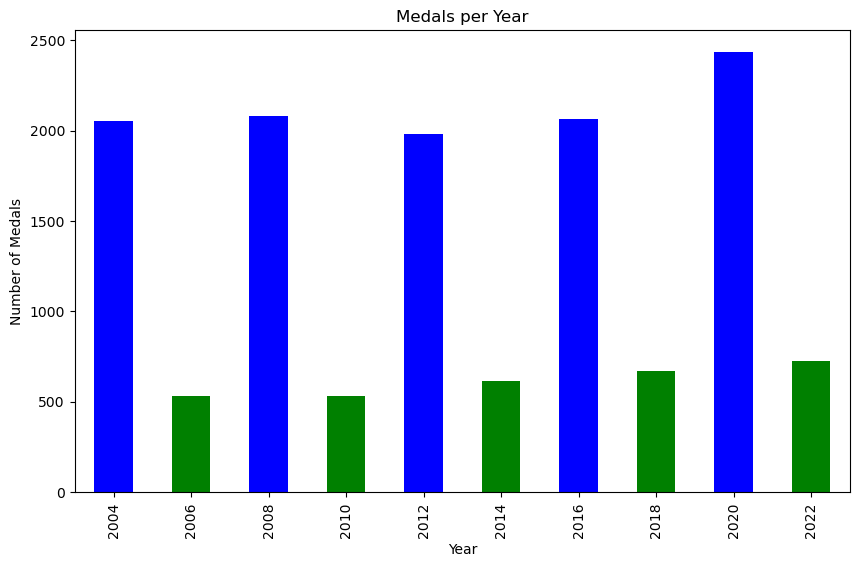

In [151]:
medals_per_year = country_event_recent_df.groupby('year')['medal'].count()

medals_per_year.head(12).plot(kind='bar', figsize=(10, 6), color=["blue", "green"])
plt.title('Medals per Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.savefig("gender_plots/Medals_per_year.png")
plt.show()


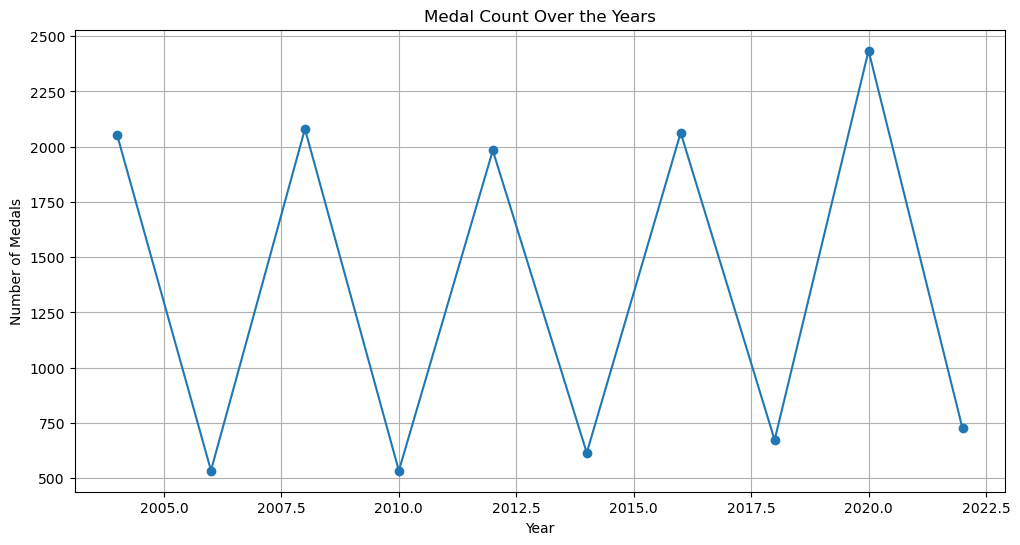

In [152]:

# Create the line plot
plt.figure(figsize=(12, 6))
medals_per_year.plot(marker='o')

# Customize the plot
plt.title('Medal Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.savefig("gender_plots/Medal_Count_over_the_years.png")
plt.show()

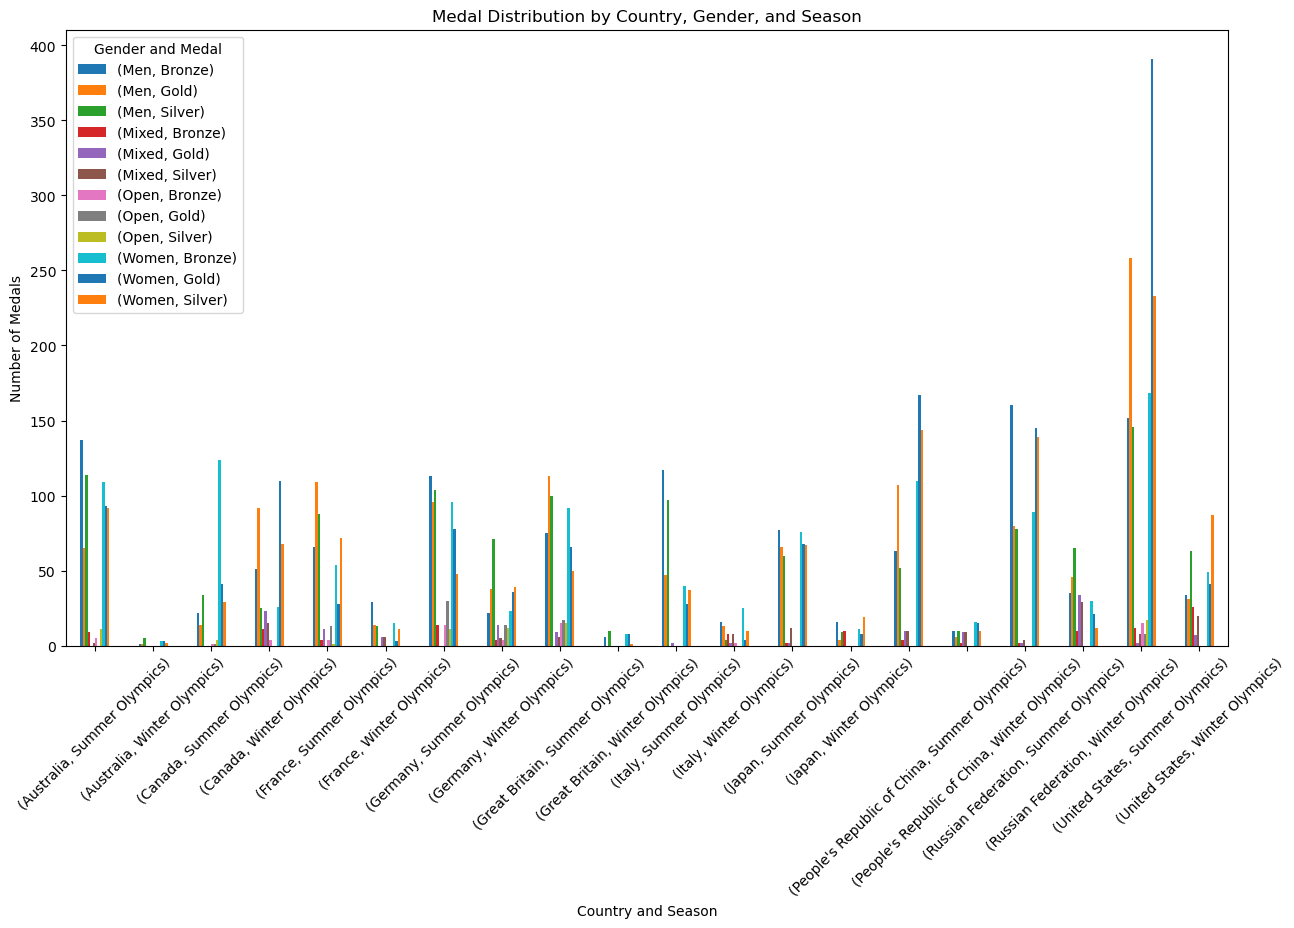

In [169]:
top_10_countries = country_event_recent_df.groupby('country')['medal'].count().nlargest(10).index
filtered_df = country_event_recent_df[country_event_recent_df['country'].isin(top_10_countries)]
grouped_data = filtered_df.groupby(['country', 'Gender', 'season', 'medal']).size().reset_index(name='Medal Count')

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot_table(index=['country', 'season'], columns=['Gender', 'medal'], values='Medal Count', fill_value=0)

# Create the grouped bar chart
pivoted_data.plot(kind='bar', figsize=(15, 8))
plt.title('Medal Distribution by Country, Gender, and Season')
plt.xlabel('Country and Season')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender and Medal')
plt.savefig("gender_plots/Medal_distribution_by_Country_Gender_Season.png")
plt.show()

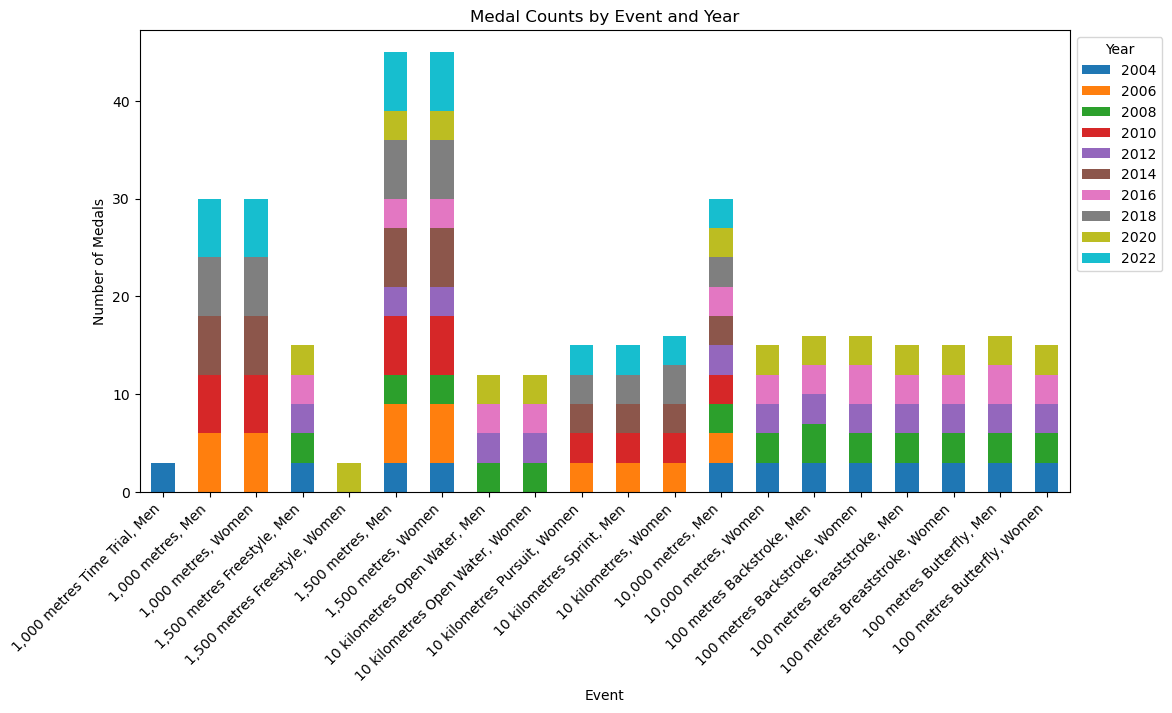

In [154]:

country_event_recent_df

# Pivot table to group data by event and year
medal_counts = country_event_recent_df.pivot_table(index='event', columns='year', values='medal', aggfunc='count')

# Create a stacked bar chart
medal_counts.head(20).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Medal Counts by Event and Year')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  
plt.savefig("gender_plots/Medal_Counts_by_Event_year.png")
plt.show()

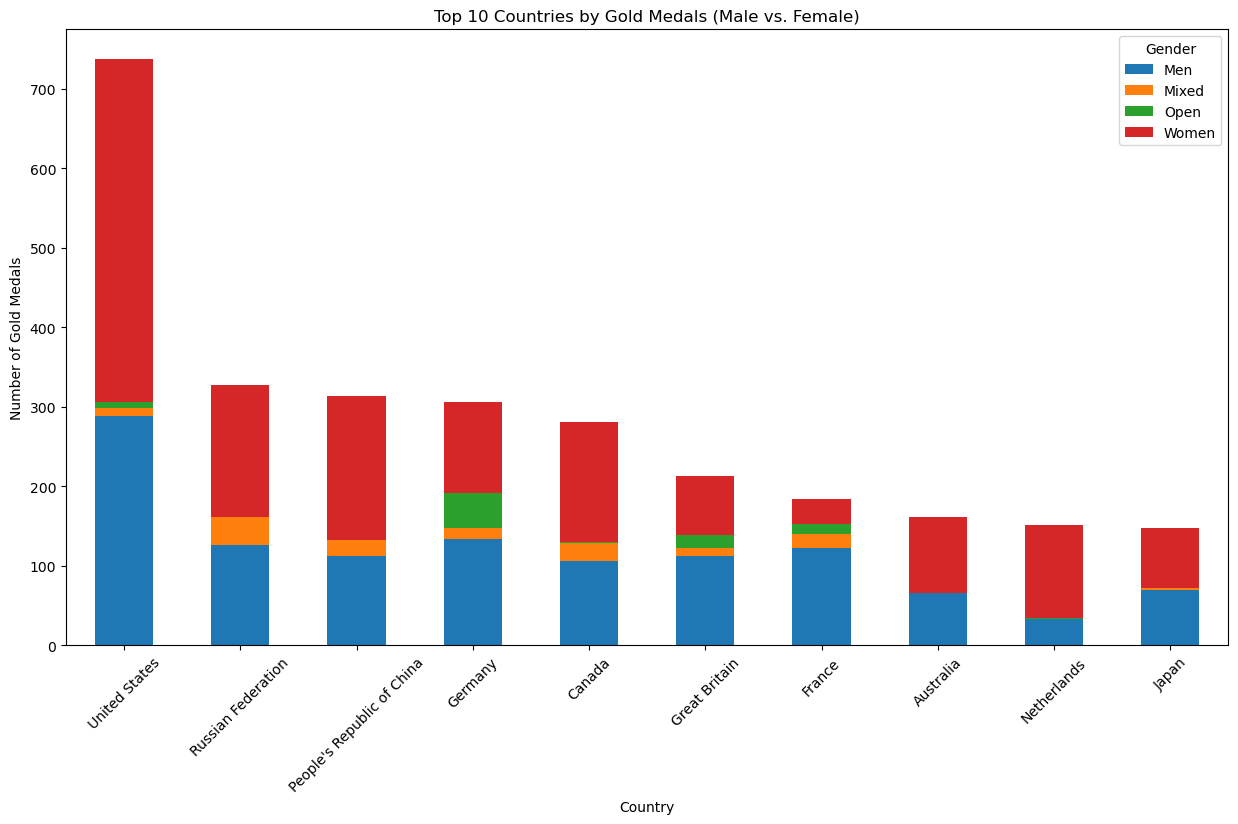

In [174]:
# Filter for gold medals
gold_medals = country_event_recent_df[country_event_recent_df['medal'] == 'Gold']

# Group by country and count the gold medals
grouped_data = gold_medals.groupby(['country', 'Gender']).size().reset_index(name='Gold Medals')

import matplotlib.pyplot as plt

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot_table(index='country', columns='Gender', values='Gold Medals', fill_value=0)

# Get the top 10 countries based on total gold medals
top_10_countries = pivoted_data.sum(axis=1).nlargest(10).index

# Filter the pivoted data for the top 10 countries
top_10_pivoted_data = pivoted_data.loc[top_10_countries]

# Create the bar chart
top_10_pivoted_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 10 Countries by Gold Medals (Male vs. Female)')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.savefig("gender_plots/Top_10_countries_by_gold.png")
plt.show()


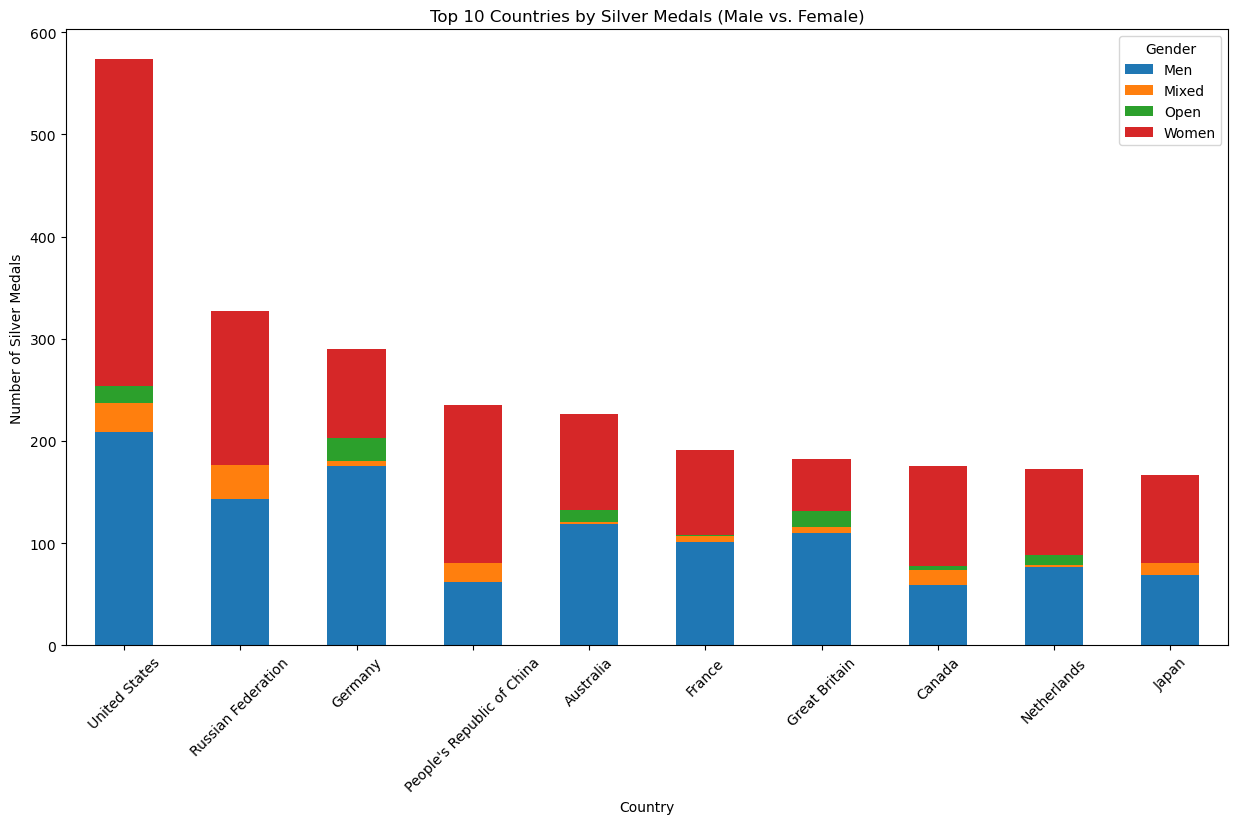

In [175]:
# Filter for silver medals
silver_medals = country_event_recent_df[country_event_recent_df['medal'] == 'Silver']

# Group by country and count the gold medals
grouped_data = silver_medals.groupby(['country', 'Gender']).size().reset_index(name='Silver Medals')

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot_table(index='country', columns='Gender', values='Silver Medals', fill_value=0)

# Get the top 10 countries based on total gold medals
top_10_countries = pivoted_data.sum(axis=1).nlargest(10).index

# Filter the pivoted data for the top 10 countries
top_10_pivoted_data = pivoted_data.loc[top_10_countries]

# Create the bar chart
top_10_pivoted_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 10 Countries by Silver Medals (Male vs. Female)')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.savefig("gender_plots/Top_10_countries_by_silver.png")
plt.show()

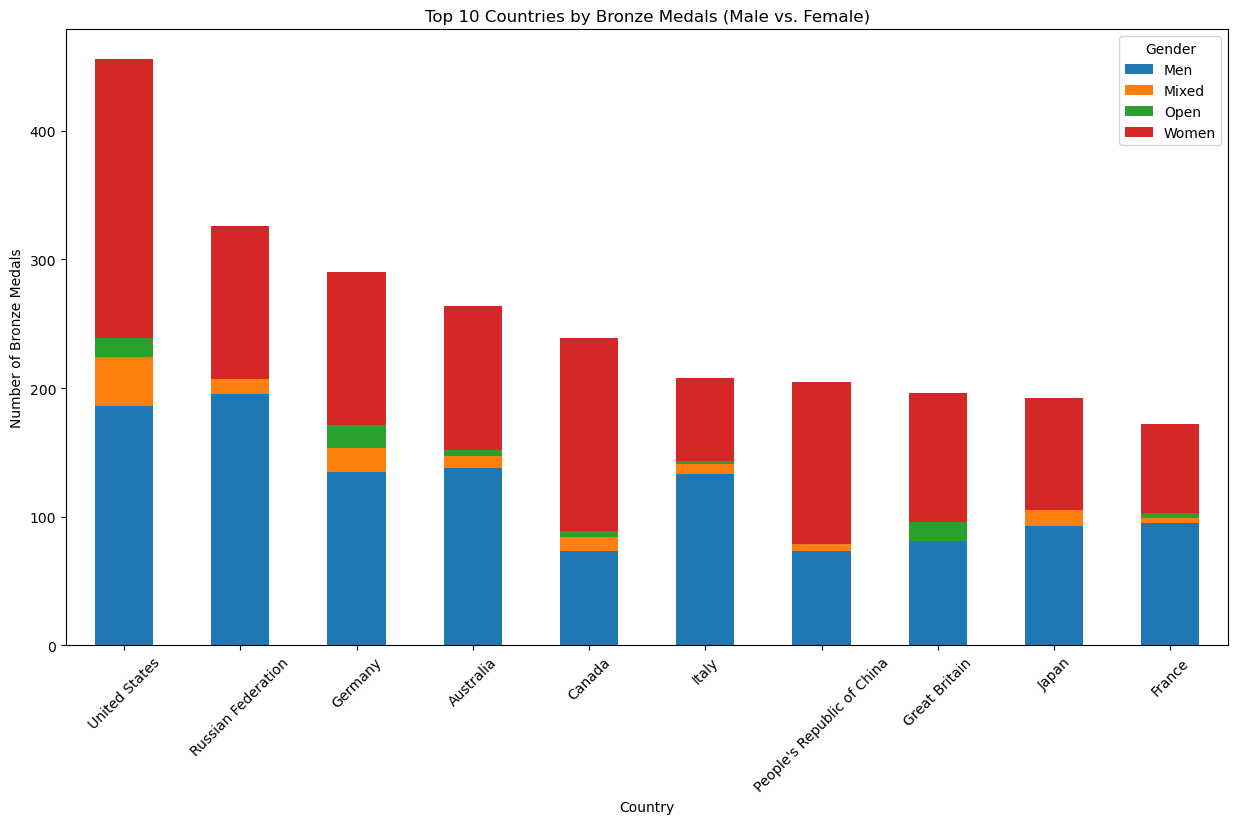

In [176]:
# Filter for bronze medals
bronze_medals = country_event_recent_df[country_event_recent_df['medal'] == 'Bronze']

# Group by country and count the gold medals
grouped_data = bronze_medals.groupby(['country', 'Gender']).size().reset_index(name='Bronze Medals')

# Pivot the data for easier plotting
pivoted_data = grouped_data.pivot_table(index='country', columns='Gender', values='Bronze Medals', fill_value=0)

# Get the top 10 countries based on total gold medals
top_10_countries = pivoted_data.sum(axis=1).nlargest(10).index

# Filter the pivoted data for the top 10 countries
top_10_pivoted_data = pivoted_data.loc[top_10_countries]

# Create the bar chart
top_10_pivoted_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Top 10 Countries by Bronze Medals (Male vs. Female)')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.savefig("gender_plots/Top_10_countries_by_bronze.png")
plt.show()

In [ ]:
gold_medals = country_event_recent_df[country_event_recent_df['medal'] == 'Gold']
gender_gold_counts = gold_medals.groupby('Gender').size()
import matplotlib.pyplot as plt

import scipy.stats as stats

import pandas as pd

# Assuming your data is in a pandas DataFrame
data = pd.DataFrame(country_event_recent_df)  # Your data
data_dropna = data.dropna()  # Drop rows with missing values

# Perform t-test using data_dropna
t_statistic, p_value = scipy.stats.ttest_ind(data_dropna['group1'], data_dropna['group2'])

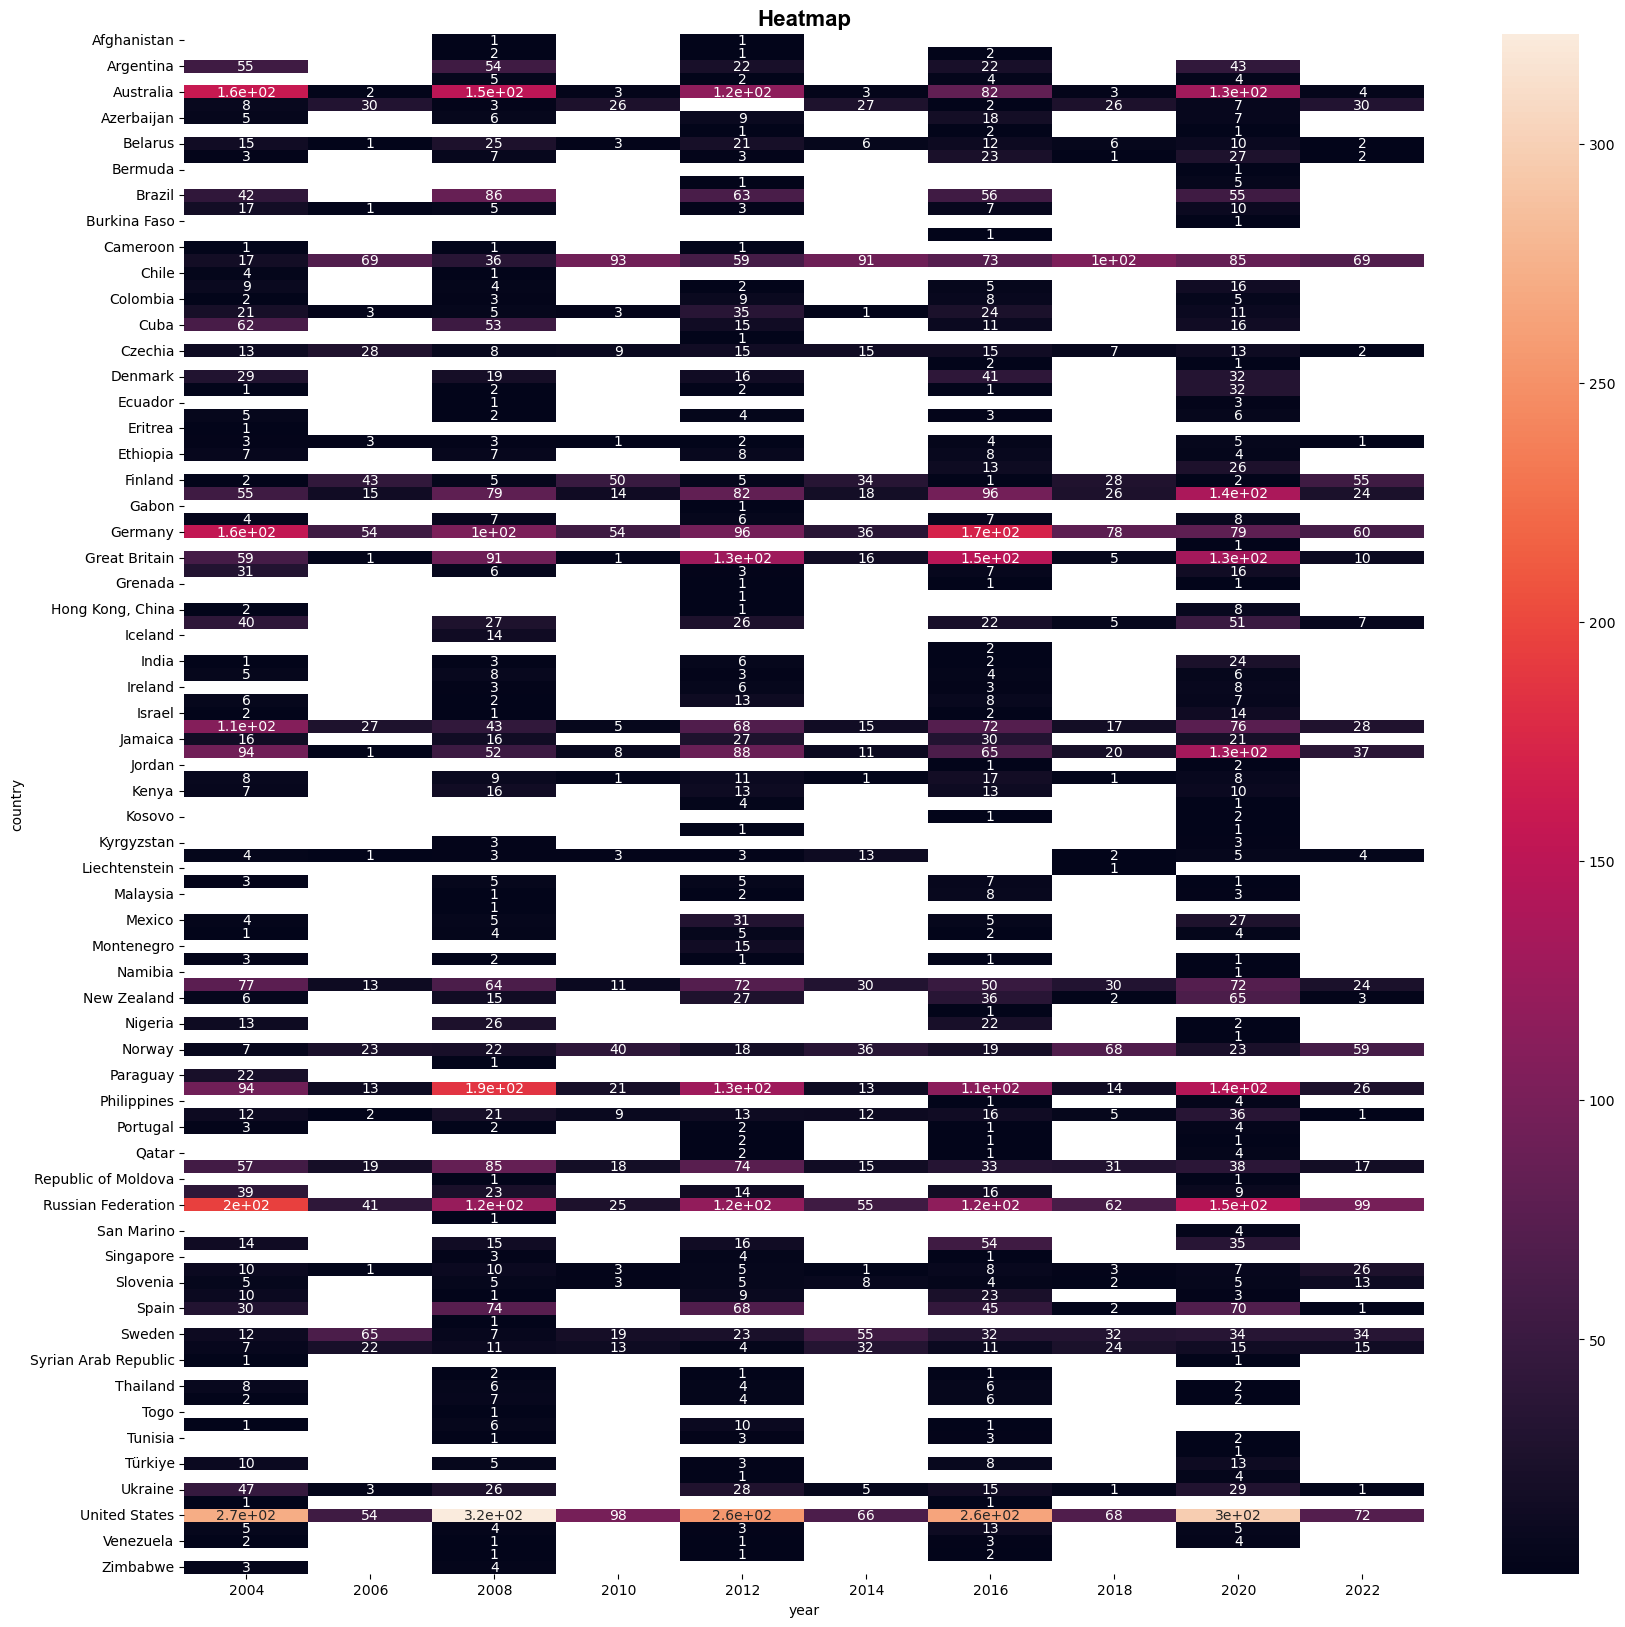

In [177]:
 # Change Canvas Size
plt.figure(figsize=(20, 20))

# Create a basic plot
df = medals_by_country_year = country_event_recent_df.groupby(['country', 'year'])['medal'].count().unstack()
sns.heatmap(df, annot=True)

# Customization
plt.title("Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()

In [ ]:
female_mask_s = country_event_recent_df['Gender'] == 'Women'
female_country_event_recent_df = country_event_recent_df[female_mask_s]
print(female_country_event_recent_df.shape)
female_country_event_recent_df.head()